In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta

In [3]:
# Definir el rango de fechas
start_date = datetime(2016, 1, 1)  # Fecha de inicio
end_date = datetime(2025, 3, 27)   # Fecha de término

# Lista para almacenar los datos
data = []

In [ ]:
# Recorrer cada día en el rango de fechas
current_date = start_date
while current_date <= end_date:
    date_str = current_date.strftime("%Y%m%d")  # Formato YYYYMMDD
    url = f"https://www.sismologia.cl/sismicidad/catalogo/{current_date.year}/{current_date.strftime('%m')}/{date_str}.html"
    
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        table = soup.find("table", class_="sismologia detalle")  # Buscar la tabla específica
        
        if table:
            rows = table.find_all("tr")
            if len(rows) > 1:
                for row in rows[1:]:  # Omitir encabezado
                    cols = row.find_all("td")
                    if len(cols) >= 5:
                        fecha_local = cols[0].text.strip()
                        fecha_utc = cols[1].text.strip()
                        
                        # Extraer Latitud y Longitud correctamente
                        latitud = None
                        longitud = None
                        if len(cols) > 2:
                            lat_long_text = cols[2].text.strip()
                            lat_long_split = lat_long_text.split(" ")  # Separar por espacio
                            latitud = lat_long_split[0] if len(lat_long_split) > 1 else None
                            longitud = lat_long_split[1] if len(lat_long_split) > 1 else None
                        
                        profundidad = cols[3].text.strip()
                        magnitud = cols[4].text.strip()
                        
                        data.append([fecha_local, fecha_utc, latitud, longitud, profundidad, magnitud])
            else:
                print(f"No hay datos en la tabla para {date_str}")
        else:
            print(f"No se encontró la tabla para {date_str}")
    else:
        print(f"Error al acceder a {url}, Código: {response.status_code}")
    
    current_date += timedelta(days=1)

In [ ]:
# Guardar en un archivo CSV si hay datos
columns = ["Fecha Local", "Fecha UTC", "Latitud", "Longitud", "Profundidad (km)", "Magnitud"]
df = pd.DataFrame(data, columns=columns)
if not df.empty:
    df.to_csv("sismos.csv", index=False, encoding="utf-8-sig")
    print("Datos guardados en sismos.csv")
else:
    print("No se encontraron datos de sismos en el período seleccionado.")


In [3]:
df = pd.read_csv('../data/sismos.csv')
df

Fecha Local            Fecha UTC  \
0        2016-01-01 20:55:03107 km al SE de OllagÃ¼e  2016-01-01 23:55:03   
1          2016-01-01 18:59:5277 km al S de OllagÃ¼e  2016-01-01 21:59:52   
2         2016-01-01 18:18:2853 km al O de Los Vilos  2016-01-01 21:18:28   
3       2016-01-01 16:00:3733 km al O de Canela Baja  2016-01-01 19:00:37   
4      2016-01-01 14:53:5930 km al SO de Canela Baja  2016-01-01 17:53:59   
...                                              ...                  ...   
69128        2025-03-26 23:59:2543 km al S de Huasco  2025-03-27 02:59:25   
69129         2025-03-26 23:44:3335 km al NE de Pica  2025-03-27 02:44:33   
69130      2025-03-26 22:48:3859 km al SE de Socaire  2025-03-27 01:48:38   
69131   2025-03-26 22:12:2634 km al NE de Farellones  2025-03-27 01:12:26   
69132       2025-03-26 21:39:2929 km al SE de Calama  2025-03-27 00:39:29   

       Latitud  Longitud Profundidad (km) Magnitud  
0      -22.040   -67.695           221 km   3.3 Ml  
1      -21.901   -68.414           132 km   3.3 Ml  
2      -31.877   -72.066            15 km   3.5 Ml  
3      -31.417   -71.802            15 km   3.3 Ml  
4      -31.522   -71.736            38 km   2.8 Ml  
...        ...       ...              ...      ...  
69128  -28.829   -71.367            34 km   2.6 Ml  
69129  -20.226   -69.147            91 km   2.7 Ml  
69130  -24.018   -67.552           252 km   2.6 Ml  
69131  -33.072   -70.153           112 km   2.6 Ml  
69132  -22.673   -68.755           110 km   2.8 Ml  

[69133 rows x 6 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69133 entries, 0 to 69132
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha Local       69133 non-null  object 
 1   Fecha UTC         69133 non-null  object 
 2   Latitud           69122 non-null  float64
 3   Longitud          69122 non-null  float64
 4   Profundidad (km)  69133 non-null  object 
 5   Magnitud          69133 non-null  object 
dtypes: float64(2), object(4)
memory usage: 3.2+ MB


In [5]:
df.drop(columns=["Fecha UTC"], inplace=True)

In [6]:
df

Fecha Local  Latitud  Longitud  \
0        2016-01-01 20:55:03107 km al SE de OllagÃ¼e  -22.040   -67.695   
1          2016-01-01 18:59:5277 km al S de OllagÃ¼e  -21.901   -68.414   
2         2016-01-01 18:18:2853 km al O de Los Vilos  -31.877   -72.066   
3       2016-01-01 16:00:3733 km al O de Canela Baja  -31.417   -71.802   
4      2016-01-01 14:53:5930 km al SO de Canela Baja  -31.522   -71.736   
...                                              ...      ...       ...   
69128        2025-03-26 23:59:2543 km al S de Huasco  -28.829   -71.367   
69129         2025-03-26 23:44:3335 km al NE de Pica  -20.226   -69.147   
69130      2025-03-26 22:48:3859 km al SE de Socaire  -24.018   -67.552   
69131   2025-03-26 22:12:2634 km al NE de Farellones  -33.072   -70.153   
69132       2025-03-26 21:39:2929 km al SE de Calama  -22.673   -68.755   

      Profundidad (km) Magnitud  
0               221 km   3.3 Ml  
1               132 km   3.3 Ml  
2                15 km   3.5 Ml  
3                15 km   3.3 Ml  
4                38 km   2.8 Ml  
...                ...      ...  
69128            34 km   2.6 Ml  
69129            91 km   2.7 Ml  
69130           252 km   2.6 Ml  
69131           112 km   2.6 Ml  
69132           110 km   2.8 Ml  

[69133 rows x 5 columns]

In [7]:
# Extraemos el número y la métrica usando expresiones regulares
df[['Valor Magnitud', 'Tipo Magnitud']] = df['Magnitud'].str.extract(r'(\d+\.\d+)\s*(.*)')

# Convertimos la columna de valor a numérico
df['Valor Magnitud'] = pd.to_numeric(df['Valor Magnitud'])

In [8]:
df.info()
df.drop(columns=["Magnitud"], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69133 entries, 0 to 69132
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha Local       69133 non-null  object 
 1   Latitud           69122 non-null  float64
 2   Longitud          69122 non-null  float64
 3   Profundidad (km)  69133 non-null  object 
 4   Magnitud          69133 non-null  object 
 5   Valor Magnitud    69133 non-null  float64
 6   Tipo Magnitud     69133 non-null  object 
dtypes: float64(3), object(4)
memory usage: 3.7+ MB


In [9]:
df

Fecha Local  Latitud  Longitud  \
0        2016-01-01 20:55:03107 km al SE de OllagÃ¼e  -22.040   -67.695   
1          2016-01-01 18:59:5277 km al S de OllagÃ¼e  -21.901   -68.414   
2         2016-01-01 18:18:2853 km al O de Los Vilos  -31.877   -72.066   
3       2016-01-01 16:00:3733 km al O de Canela Baja  -31.417   -71.802   
4      2016-01-01 14:53:5930 km al SO de Canela Baja  -31.522   -71.736   
...                                              ...      ...       ...   
69128        2025-03-26 23:59:2543 km al S de Huasco  -28.829   -71.367   
69129         2025-03-26 23:44:3335 km al NE de Pica  -20.226   -69.147   
69130      2025-03-26 22:48:3859 km al SE de Socaire  -24.018   -67.552   
69131   2025-03-26 22:12:2634 km al NE de Farellones  -33.072   -70.153   
69132       2025-03-26 21:39:2929 km al SE de Calama  -22.673   -68.755   

      Profundidad (km)  Valor Magnitud Tipo Magnitud  
0               221 km             3.3            Ml  
1               132 km             3.3            Ml  
2                15 km             3.5            Ml  
3                15 km             3.3            Ml  
4                38 km             2.8            Ml  
...                ...             ...           ...  
69128            34 km             2.6            Ml  
69129            91 km             2.7            Ml  
69130           252 km             2.6            Ml  
69131           112 km             2.6            Ml  
69132           110 km             2.8            Ml  

[69133 rows x 6 columns]

In [10]:
# Eliminar 'km' y convertir a numérico
df['Profundidad (km)'] = df['Profundidad (km)'].str.replace(' km', '').astype(float)

In [11]:
df

Fecha Local  Latitud  Longitud  \
0        2016-01-01 20:55:03107 km al SE de OllagÃ¼e  -22.040   -67.695   
1          2016-01-01 18:59:5277 km al S de OllagÃ¼e  -21.901   -68.414   
2         2016-01-01 18:18:2853 km al O de Los Vilos  -31.877   -72.066   
3       2016-01-01 16:00:3733 km al O de Canela Baja  -31.417   -71.802   
4      2016-01-01 14:53:5930 km al SO de Canela Baja  -31.522   -71.736   
...                                              ...      ...       ...   
69128        2025-03-26 23:59:2543 km al S de Huasco  -28.829   -71.367   
69129         2025-03-26 23:44:3335 km al NE de Pica  -20.226   -69.147   
69130      2025-03-26 22:48:3859 km al SE de Socaire  -24.018   -67.552   
69131   2025-03-26 22:12:2634 km al NE de Farellones  -33.072   -70.153   
69132       2025-03-26 21:39:2929 km al SE de Calama  -22.673   -68.755   

       Profundidad (km)  Valor Magnitud Tipo Magnitud  
0                 221.0             3.3            Ml  
1                 132.0             3.3            Ml  
2                  15.0             3.5            Ml  
3                  15.0             3.3            Ml  
4                  38.0             2.8            Ml  
...                 ...             ...           ...  
69128              34.0             2.6            Ml  
69129              91.0             2.7            Ml  
69130             252.0             2.6            Ml  
69131             112.0             2.6            Ml  
69132             110.0             2.8            Ml  

[69133 rows x 6 columns]

In [12]:
# Extraer el patrón YYYY-MM-DD HH:MM:SS usando una expresión regular
df['Fecha Local'] = df['Fecha Local'].str.extract(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})')[0]

# Convertir a datetime (esto funcionará ahora que tenemos un formato limpio)
df['Fecha Local'] = pd.to_datetime(df['Fecha Local'], format='%Y-%m-%d %H:%M:%S')


In [13]:
df

Fecha Local  Latitud  Longitud  Profundidad (km)  \
0     2016-01-01 20:55:03  -22.040   -67.695             221.0   
1     2016-01-01 18:59:52  -21.901   -68.414             132.0   
2     2016-01-01 18:18:28  -31.877   -72.066              15.0   
3     2016-01-01 16:00:37  -31.417   -71.802              15.0   
4     2016-01-01 14:53:59  -31.522   -71.736              38.0   
...                   ...      ...       ...               ...   
69128 2025-03-26 23:59:25  -28.829   -71.367              34.0   
69129 2025-03-26 23:44:33  -20.226   -69.147              91.0   
69130 2025-03-26 22:48:38  -24.018   -67.552             252.0   
69131 2025-03-26 22:12:26  -33.072   -70.153             112.0   
69132 2025-03-26 21:39:29  -22.673   -68.755             110.0   

       Valor Magnitud Tipo Magnitud  
0                 3.3            Ml  
1                 3.3            Ml  
2                 3.5            Ml  
3                 3.3            Ml  
4                 2.8            Ml  
...               ...           ...  
69128             2.6            Ml  
69129             2.7            Ml  
69130             2.6            Ml  
69131             2.6            Ml  
69132             2.8            Ml  

[69133 rows x 6 columns]

In [14]:
# Mostrar los tipos de magnitud y cuántas veces aparecen
print(df['Tipo Magnitud'].value_counts())

Tipo Magnitud
Ml     66634
Mw      2213
Mww      229
M         25
Mb        17
Mlv       10
Ms         4
Mlh        1
Name: count, dtype: int64


Observación:
- Distintas mediciones, intentar homogeniar datos.
- Las magnitudes fueron homogeneizadas a Mw usando fórmulas calibradas para Chile (Mw = 0.81·Ml + 1.08 para eventos locales, y Mw = Mb + 0.27 para sismos profundos, según CSN).

In [15]:
# Filtrar solo datos con Magnitud de Momento (Mw/Mww)
df_mw = df[df['Tipo Magnitud'].isin(['Mw', 'Mww'])]

# Ver distribución de estas magnitudes
print(df_mw['Valor Magnitud'].describe())

count    2442.000000
mean        4.756061
std         0.475450
min         3.600000
25%         4.400000
50%         4.600000
75%         5.000000
max         7.600000
Name: Valor Magnitud, dtype: float64


In [16]:
import numpy as np

def convertir_a_Mw_chile(tipo, valor):
    if tipo == 'Ml':
        return 0.81 * valor + 1.08  # Ajuste para Chile
    elif tipo == 'Mb':
        return valor + 0.27
    elif tipo in ['Mw', 'Mww']:
        return valor  # Ya está en Mw
    else:  # Mlv, Mlh, M (tratar como Ml)
        return 0.81 * valor + 1.08

# Aplicar la conversión
df['Mw_Chile'] = df.apply(lambda x: convertir_a_Mw_chile(x['Tipo Magnitud'], x['Valor Magnitud']), axis=1)

# Ver resultados
print(df[['Tipo Magnitud', 'Valor Magnitud', 'Mw_Chile']].head())

  Tipo Magnitud  Valor Magnitud  Mw_Chile
0            Ml             3.3     3.753
1            Ml             3.3     3.753
2            Ml             3.5     3.915
3            Ml             3.3     3.753
4            Ml             2.8     3.348


In [17]:
df

Fecha Local  Latitud  Longitud  Profundidad (km)  \
0     2016-01-01 20:55:03  -22.040   -67.695             221.0   
1     2016-01-01 18:59:52  -21.901   -68.414             132.0   
2     2016-01-01 18:18:28  -31.877   -72.066              15.0   
3     2016-01-01 16:00:37  -31.417   -71.802              15.0   
4     2016-01-01 14:53:59  -31.522   -71.736              38.0   
...                   ...      ...       ...               ...   
69128 2025-03-26 23:59:25  -28.829   -71.367              34.0   
69129 2025-03-26 23:44:33  -20.226   -69.147              91.0   
69130 2025-03-26 22:48:38  -24.018   -67.552             252.0   
69131 2025-03-26 22:12:26  -33.072   -70.153             112.0   
69132 2025-03-26 21:39:29  -22.673   -68.755             110.0   

       Valor Magnitud Tipo Magnitud  Mw_Chile  
0                 3.3            Ml     3.753  
1                 3.3            Ml     3.753  
2                 3.5            Ml     3.915  
3                 3.3            Ml     3.753  
4                 2.8            Ml     3.348  
...               ...           ...       ...  
69128             2.6            Ml     3.186  
69129             2.7            Ml     3.267  
69130             2.6            Ml     3.186  
69131             2.6            Ml     3.186  
69132             2.8            Ml     3.348  

[69133 rows x 7 columns]

Duplicados y nulos

In [18]:
# Verificar filas duplicadas en todas las columnas
duplicados = df.duplicated()
print(f"Número de filas duplicadas: {duplicados.sum()}")

# Mostrar ejemplos de duplicados (opcional)
print(df[duplicados].head())

Número de filas duplicadas: 1
              Fecha Local  Latitud  Longitud  Profundidad (km)  \
42764 2021-08-11 19:34:22  -29.631   -69.227             136.0   

       Valor Magnitud Tipo Magnitud  Mw_Chile  
42764             3.1            Ml     3.591  


In [19]:
df = df.drop_duplicates()

In [20]:
# Resumen de valores nulos
print(df.isnull().sum())


Fecha Local          0
Latitud             11
Longitud            11
Profundidad (km)     0
Valor Magnitud       0
Tipo Magnitud        0
Mw_Chile             0
dtype: int64


In [21]:
df =df.dropna()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69121 entries, 0 to 69132
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha Local       69121 non-null  datetime64[ns]
 1   Latitud           69121 non-null  float64       
 2   Longitud          69121 non-null  float64       
 3   Profundidad (km)  69121 non-null  float64       
 4   Valor Magnitud    69121 non-null  float64       
 5   Tipo Magnitud     69121 non-null  object        
 6   Mw_Chile          69121 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 4.2+ MB


In [23]:
#guardar el DataFrame limpio
df.to_csv('../data/sismos_limpio.csv', index=False, encoding='utf-8-sig')

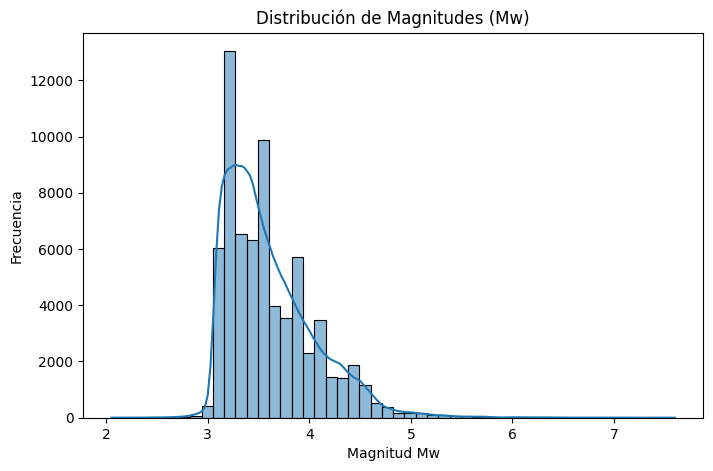

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Mw_Chile'], bins=50, kde=True)
plt.xlabel("Magnitud Mw")
plt.ylabel("Frecuencia")
plt.title("Distribución de Magnitudes (Mw)")
plt.show()

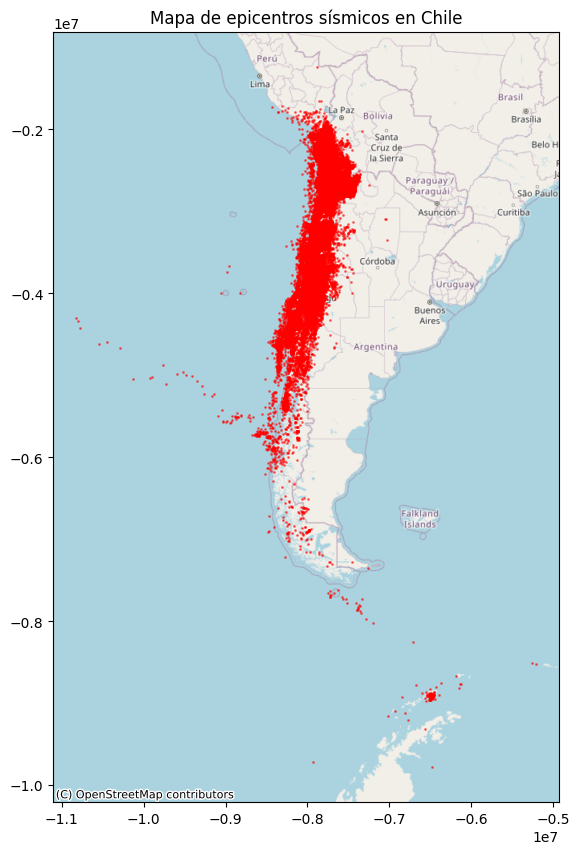

In [25]:
import geopandas as gpd
import contextily as ctx

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitud, df.Latitud), crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)  # Convertir a métrica para mapas

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, alpha=0.5, markersize=1, color="red")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("Mapa de epicentros sísmicos en Chile")
plt.show()

In [26]:
sismos_mayores_6 = df[df['Mw_Chile'] >= 6]

print(f"Número de sismos con magnitud Mw >= 6: {len(sismos_mayores_6)}")
print(f"el porcentaje de sismos con magnitud Mw >= 6 es: {len(sismos_mayores_6)/len(df)*100:.2f}%")

Número de sismos con magnitud Mw >= 6: 73
el porcentaje de sismos con magnitud Mw >= 6 es: 0.11%


In [31]:
from folium.plugins import MarkerCluster

# Filtrar sismos >= 6 Mw
sismos_grandes = gdf[gdf['Mw_Chile'] >= 6].copy()

# Centrar el mapa en Chile (promedio de coordenadas)
mapa = folium.Map(
    location=[-35.675, -71.543],  # Latitud y longitud central de Chile
    zoom_start=5,
    tiles="OpenStreetMap"  # Estilo del mapa (también puedes usar "Stamen Terrain")
)

# Agrupar marcadores para mejor visualización (MarkerCluster)
marker_cluster = MarkerCluster().add_to(mapa)

# Añadir cada sismo con popup informativo
for _, row in sismos_grandes.iterrows():
    popup_text = f"""
    <b>Fecha:</b> {row['Fecha Local'].strftime('%Y-%m-%d')}<br>
    <b>Magnitud (Mw):</b> {row['Mw_Chile']:.1f}<br>
    <b>Profundidad:</b> {row['Profundidad (km)']:.1f} km<br>
    <b>Ubicación:</b> {row['Latitud']:.2f}, {row['Longitud']:.2f}
    """
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=row['Mw_Chile'] * 1.5,  # Tamaño proporcional a la magnitud
        color="red",
        fill=True,
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=300),
        tooltip=f"Magnitud: {row['Mw_Chile']:.1f}"
    ).add_to(marker_cluster)

# Añadir control de capas (opcional)
folium.LayerControl().add_to(mapa)

# Guardar mapa como HTML
mapa.save("mapa_sismos_chile.html")
mapa  # Mostrar en Jupyter Notebook (si lo usas)

In [30]:
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en Chile
m = folium.Map(location=[-35, -72], zoom_start=5)

# Agregar el heatmap de sismos
heat_data = list(zip(df['Latitud'], df['Longitud'], df['Mw_Chile']))  # (lat, lon, intensidad)
HeatMap(heat_data, radius=11).add_to(m)

# Mostrar el mapa interactivo
m

/tmp/ipykernel_30503/1724856362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Fecha Local'].dt.year, palette='viridis')


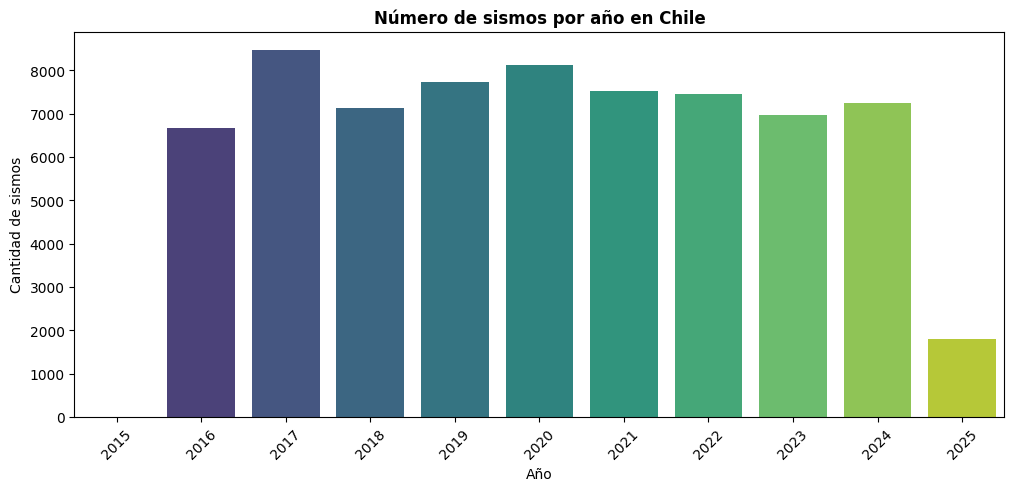

In [32]:

# Sismos por año
plt.figure(figsize=(12, 5))
sns.countplot(x=df['Fecha Local'].dt.year, palette='viridis')
plt.title('Número de sismos por año en Chile', fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Cantidad de sismos')
plt.xticks(rotation=45)
plt.show()

In [44]:
import plotly.graph_objects as go

# Asumiento que tu DataFrame se llama 'df' y tiene estas columnas:
# Latitud, Longitud, Profundidad (km), Mw_Chile

# Filtrar datos relevantes (ej: sismos con Mw >= 4.0)
df_3d = df[df['Mw_Chile'] >= 4.0]

# Crear figura 3D
fig = go.Figure()

# Añadir traza de sismos
fig.add_trace(
    go.Scatter3d(
        x=df_3d['Longitud'],          # Eje X: Longitud
        y=df_3d['Latitud'],           # Eje Y: Latitud
        z=df_3d['Profundidad (km)'],  # Eje Z: Profundidad (positivo hacia abajo)
        mode='markers',
        marker=dict(
            size=df_3d['Mw_Chile'] * 1,  # Tamaño proporcional a la magnitud
            color=df_3d['Mw_Chile'],       # Color por magnitud
            colorscale='Viridis',          # Escala de color ('Plasma', 'Inferno', etc.)
            opacity=0.7,                   # Transparencia para evitar saturación
            line=dict(width=0)             # ¡Eliminar bordes blancos!
        ),
        text=df_3d['Fecha Local'].astype(str) + '<br>Magnitud: ' + df_3d['Mw_Chile'].astype(str),  # Texto en hover
        hoverinfo='text'
    )
)

# Ajustar diseño
fig.update_layout(
    scene=dict(
        xaxis_title='Longitud',
        yaxis_title='Latitud',
        zaxis_title='Profundidad (km)',
        zaxis=dict(autorange='reversed'),  # Invertir eje Z (para que 0 km sea la superficie)
        aspectmode='manual',               # Ajustar proporciones de ejes
        aspectratio=dict(x=1, y=1, z=0.3)  # Relación de aspecto (ajustar según necesidad)
    ),
    title='<b>Sismos en Chile: Mapa 3D de Magnitud y Profundidad</b>',
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()